<a href="https://colab.research.google.com/github/K33ngston/pandas-w-python/blob/main/Data%20Preprocessing%20and%20lemmitization_Assignment_5_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('HateSpeechKe.csv')
#preview the data
df.head()

,hate_speech,offensive_language,neither,Class,Tweet
0,0,0,3,0,['The political elite are in desperation. Ordi...
1,0,0,3,0,"[""Am just curious the only people who are call..."
2,0,0,3,0,['USERNAME_3 the area politicians are the one ...
3,0,0,3,0,['War expected in Nakuru if something is not d...
4,0,0,3,0,['USERNAME_4 tells kikuyus activists that they...


In [ ]:
#importing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Downloading required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

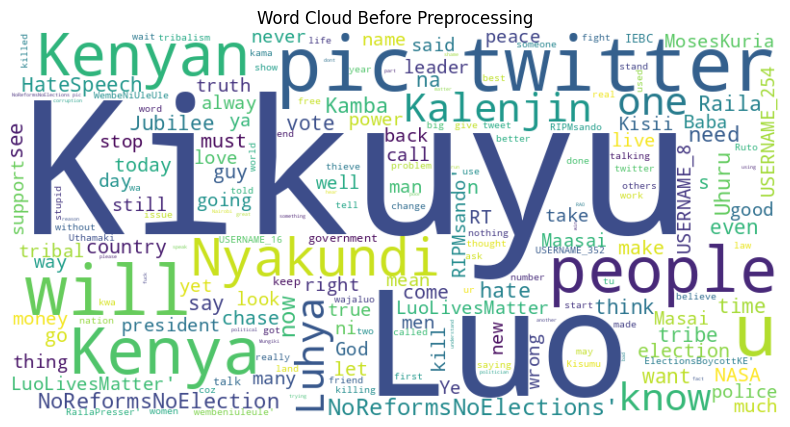

In [ ]:
# Combine all tweets into a single string
all_tweets = ' '.join(df['Tweet'])

# Generate word cloud before preprocessing
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

In [ ]:
# Initializing stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Defining preprocessing functions
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Remove non-alphanumeric tokens
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    stemmed_tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    pos_tags = pos_tag(tokens)  # POS Tagging
    chunks = ne_chunk(pos_tags)  # Chunking (Named Entity Recognition)
    return tokens, stemmed_tokens, lemmatized_tokens, pos_tags, chunks

# Applying preprocessing to each tweet
df['tokens'], df['stemmed_tokens'], df['lemmatized_tokens'], df['pos_tags'], df['chunks'] = zip(*df['Tweet'].apply(preprocess_text))

# Displaying processed data
df.head()


,hate_speech,offensive_language,neither,Class,Tweet,tokens,stemmed_tokens,lemmatized_tokens,pos_tags,chunks
0,0,0,3,0,['The political elite are in desperation. Ordi...,"[political, elite, desperation, ordinary, kale...","[polit, elit, desper, ordinari, kalenjin, susp...","[political, elite, desperation, ordinary, kale...","[(political, JJ), (elite, NN), (desperation, N...","[(political, JJ), (elite, NN), (desperation, N..."
1,0,0,3,0,"[""Am just curious the only people who are call...","[curious, people, calling, old, mad, kikuyus, ...","[curiou, peopl, call, old, mad, kikuyu, kalenj...","[curious, people, calling, old, mad, kikuyus, ...","[(curious, JJ), (people, NNS), (calling, VBG),...","[(curious, JJ), (people, NNS), (calling, VBG),..."
2,0,0,3,0,['USERNAME_3 the area politicians are the one ...,"[area, politicians, one, blame, coz, r, insiti...","[area, politician, one, blame, coz, r, insit, ...","[area, politician, one, blame, coz, r, insitin...","[(area, NN), (politicians, NNS), (one, CD), (b...","[(area, NN), (politicians, NNS), (one, CD), (b..."
3,0,0,3,0,['War expected in Nakuru if something is not d...,"[expected, nakuru, something, done, luos, give...","[expect, nakuru, someth, done, luo, given, sev...","[expected, nakuru, something, done, luo, given...","[(expected, VBN), (nakuru, JJ), (something, NN...","[(expected, VBN), (nakuru, JJ), (something, NN..."
4,0,0,3,0,['USERNAME_4 tells kikuyus activists that they...,"[tells, kikuyus, activists, targeted, targette...","[tell, kikuyu, activist, target, target, want,...","[tell, kikuyus, activist, targeted, targetted,...","[(tells, NNS), (kikuyus, VBP), (activists, NNS...","[(tells, NNS), (kikuyus, VBP), (activists, NNS..."


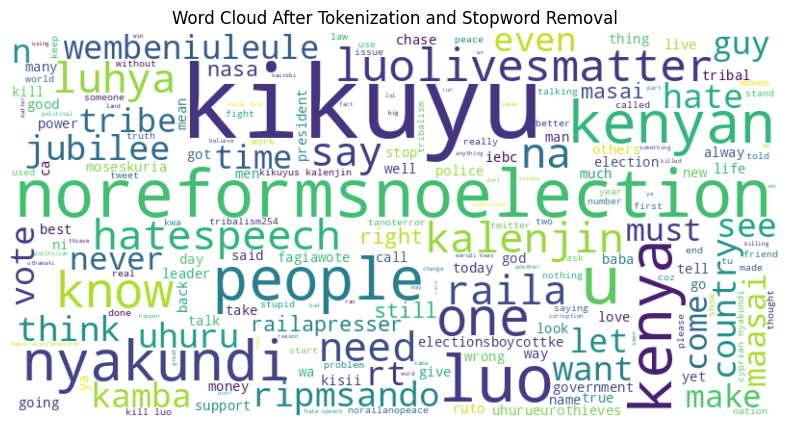

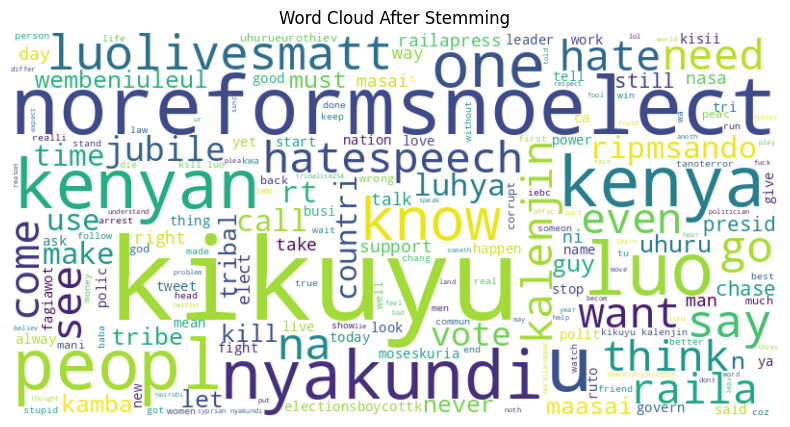

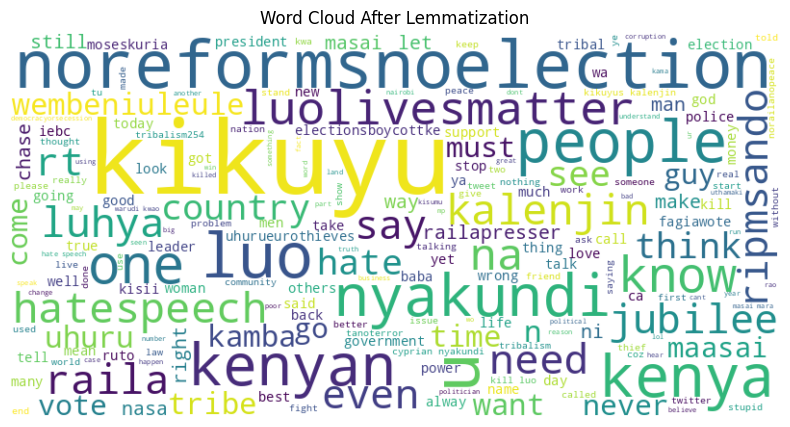

In [ ]:
# Combine all preprocessed tokens into a single string
all_tokens = ' '.join([' '.join(tokens) for tokens in df['tokens']])
all_stemmed_tokens = ' '.join([' '.join(tokens) for tokens in df['stemmed_tokens']])
all_lemmatized_tokens = ' '.join([' '.join(tokens) for tokens in df['lemmatized_tokens']])

# Generate word cloud after tokenization and stopword removal
wordcloud_after_tokens = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)
wordcloud_after_stemming = WordCloud(width=800, height=400, background_color='white').generate(all_stemmed_tokens)
wordcloud_after_lemmatization = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_tokens)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_after_tokens, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Tokenization and Stopword Removal')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_after_stemming, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Stemming')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_after_lemmatization, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Lemmatization')
plt.show()
